1. What is the overall sales trend?

2. Which are the Top 10 products by sales?

3. Which are the Most Selling Products?

4. Which is the most preferred Ship Mode?

5. Which are the Most Profitable Category and Sub-Category?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.shape

(51290, 21)

In [6]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

**1. What is the overall sales trend?**


In [12]:
df['month_year']= df['order_date'].apply(lambda x: x.strftime("%Y-%m"))

In [13]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [37]:
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

C:\Users\mansi desai\AppData\Local\Temp\ipykernel_29156\1606497153.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df.groupby('month_year').sum()['sales'].reset_index()


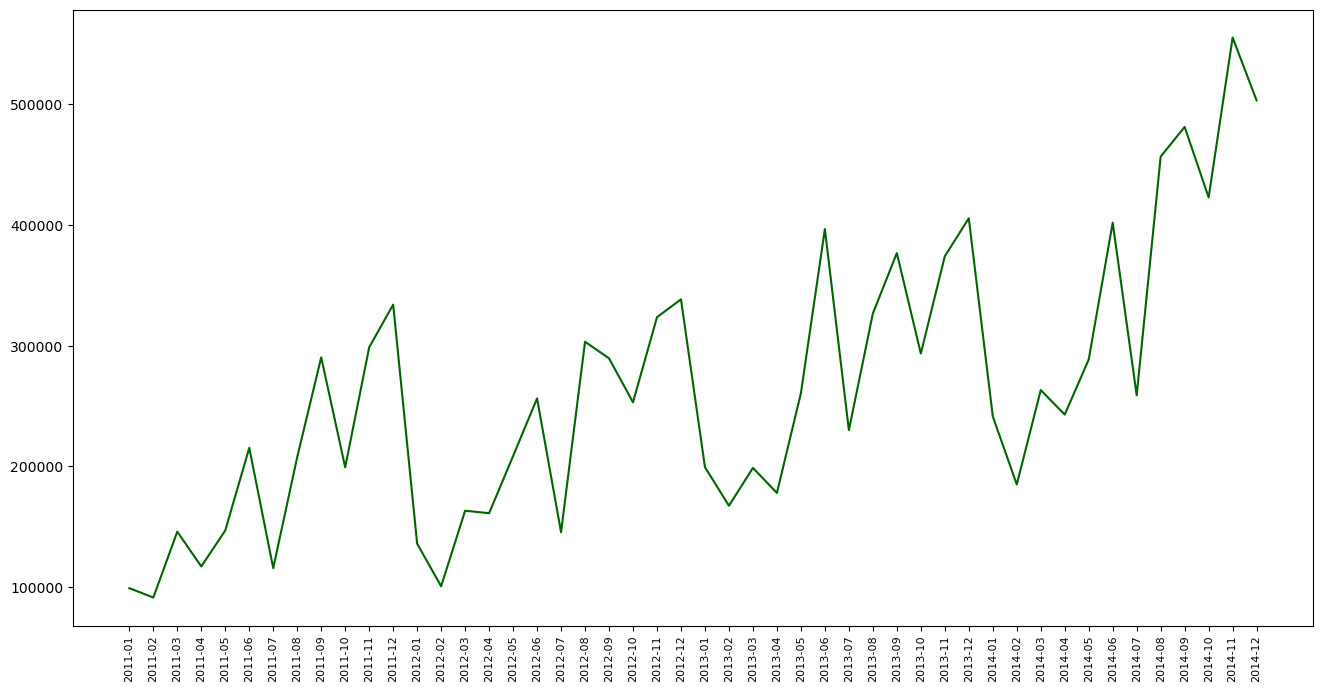

In [51]:
plt.figure(figsize=(16,8))
plt.plot(df_temp['month_year'],df_temp['sales'],color = 'darkgreen')
plt.xticks(rotation='vertical',size=8)
plt.show()


**2. Which are the Top 10 products by sales?**

In [62]:
df_topProd = pd.DataFrame(df.groupby('product_name').sum()['sales'])

C:\Users\mansi desai\AppData\Local\Temp\ipykernel_29156\4071077485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_topProd = pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [81]:
df_topProd.reset_index()

Top 10 products by sales



,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [72]:
topProductSales=df_topProd.sort_values(by=['sales'],ascending = False).reset_index()

In [73]:
print('Top 10 products by sales\n')
topProductSales.head(10)

,product_name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030
3,"Nokia Smart Phone, Full Size",71904.5555
4,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,"Samsung Smart Phone, Cordless",48653.4600
9,"Nokia Smart Phone, with Caller ID",47877.7857


**3. Which are the Most Selling Products?**

In [74]:
df_mostSelling = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

C:\Users\mansi desai\AppData\Local\Temp\ipykernel_29156\2393267395.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mostSelling = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


In [79]:
MostSellingProducts = df_mostSelling.sort_values(by='quantity',ascending = False).reset_index()

In [82]:
print('Top 20 most selling products\n')
MostSellingProducts.head(20)

Top 20 most selling products



,product_name,quantity
0,Staples,876
1,"Cardinal Index Tab, Clear",337
2,"Eldon File Cart, Single Width",321
3,"Rogers File Cart, Single Width",262
4,"Sanford Pencil Sharpener, Water Color",259
5,"Stockwell Paper Clips, Assorted Sizes",253
6,"Avery Index Tab, Clear",252
7,"Ibico Index Tab, Clear",251
8,"Smead File Cart, Single Width",250
9,"Stanley Pencil Sharpener, Water Color",242


**4. Which is the most preferred Ship Mode?**

In [86]:
df['ship_mode']

0        Standard Class
1        Standard Class
2          Second Class
3          Second Class
4        Standard Class
              ...      
51285    Standard Class
51286    Standard Class
51287      Second Class
51288    Standard Class
51289    Standard Class
Name: ship_mode, Length: 51290, dtype: object

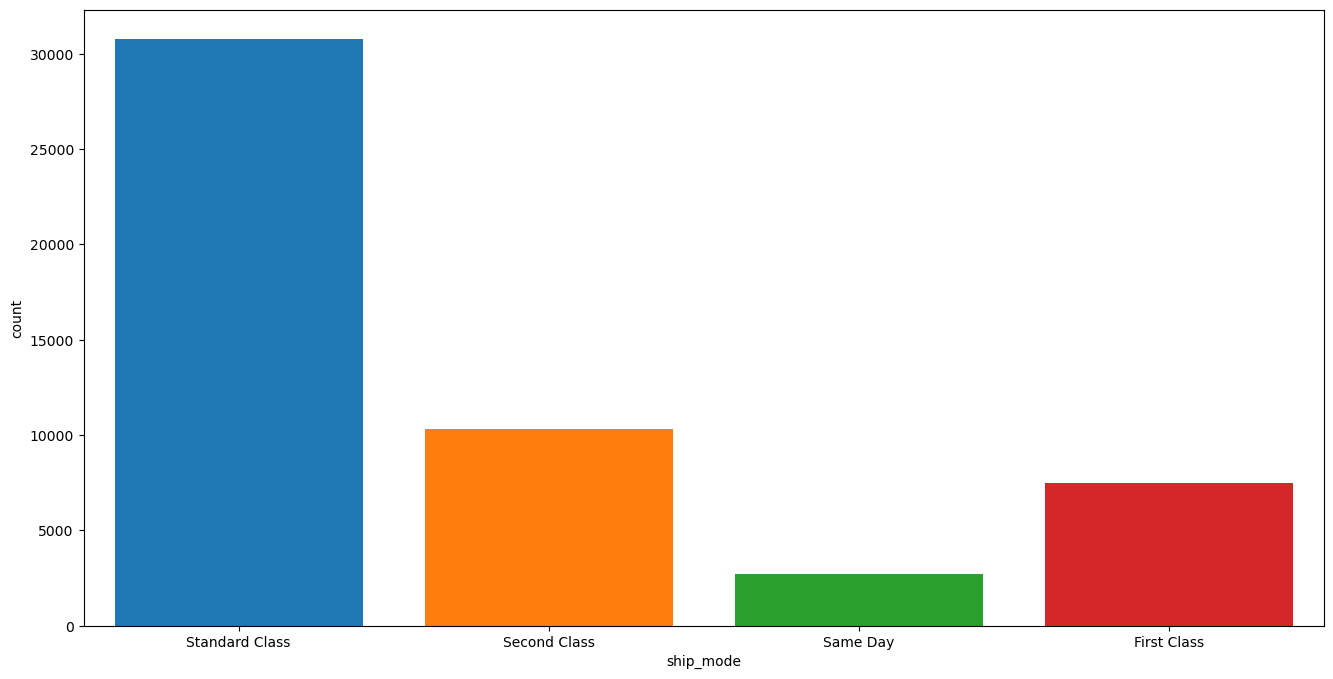

In [101]:
plt.figure(figsize=(16,8))

sns.countplot(x='ship_mode',data=df,saturation = 1)
plt.show()

**5. Which are the Most Profitable Category and Sub-Category?**

In [102]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

C:\Users\mansi desai\AppData\Local\Temp\ipykernel_29156\2496734656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870